<a href="https://colab.research.google.com/github/rohitLanjewar03/Machine-Learning/blob/main/Practical_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree



# Load the dataset (update the path to where you have saved the dataset)
data = pd.read_csv('/content/healthcare_dataset.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [37]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (or alternatively, fill them with mean/median values)
data = data.dropna()  # Alternatively, use data.fillna(method='ffill') or 'bfill' for imputation


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Accuracy: 0.18153153153153154
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.22      0.20      1915
           1       0.18      0.22      0.20      1847
           2       0.17      0.21      0.19      1871
           3       0.18      0.14      0.16      1822
           4       0.18      0.23      0.21      1788
           5       0.18      0.07      0.10      1857

    accuracy                           0.18     11100
   macro avg       0.18      0.18      0.18     11100
weighted avg       0.18      0.18      0.18     11100



[Text(0.4485294117647059, 0.9166666666666666, 'Test Results <= 0.5\ngini = 0.833\nsamples = 55500\nvalue = [9308, 9185, 9227, 9304, 9245, 9231]'),
 Text(0.17647058823529413, 0.75, 'Medical Condition <= 0.5\ngini = 0.833\nsamples = 18627\nvalue = [3188, 3009, 3118, 3168, 3012, 3132]'),
 Text(0.3125, 0.8333333333333333, 'True  '),
 Text(0.11764705882352941, 0.5833333333333334, 'gini = 0.833\nsamples = 3732\nvalue = [667, 571, 614, 637, 612, 631]'),
 Text(0.23529411764705882, 0.5833333333333334, 'Medical Condition <= 3.5\ngini = 0.833\nsamples = 14895\nvalue = [2521, 2438, 2504, 2531, 2400, 2501]'),
 Text(0.17647058823529413, 0.4166666666666667, 'Medical Condition <= 2.5\ngini = 0.833\nsamples = 11191\nvalue = [1879.0, 1833.0, 1891.0, 1912.0, 1828.0, 1848.0]'),
 Text(0.11764705882352941, 0.25, 'Medical Condition <= 1.5\ngini = 0.833\nsamples = 7454\nvalue = [1218, 1223, 1259, 1287, 1217, 1250]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.833\nsamples = 3747\nvalue = [636,

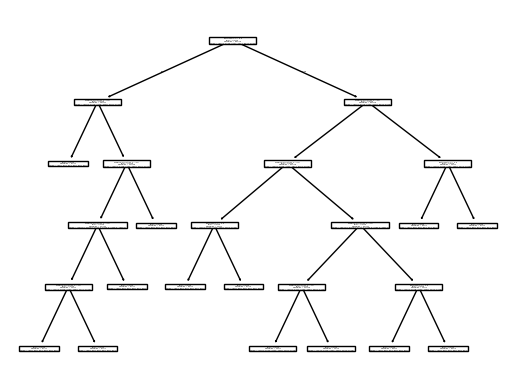

In [56]:
label_encoder = LabelEncoder()

categorical_columns = ['Medical Condition',
                         'Test Results']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data[['Medication', 'Test Results']]
y = data['Medical Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", max_depth=5,random_state=42)
model = model.fit(X, y)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

tree.plot_tree(model, feature_names=categorical_columns)
